RANDOM FOREST TREE (CAR SALE PREDICTION) S.PRAVEENA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

from sklearn.tree import plot_tree


In [2]:
df = pd.read_csv('/content/drive/MyDrive/cardekho_data.csv')
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


RANDOM FOREST TREE (

In [8]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [11]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=100,
    max_depth=5,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestRegressor(max_depth=5, random_state=42)

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

print(f"Mean Squared Error:{mse:.2f}")
print(f"R-squared:{r2:.2f}")

Mean Squared Error:1.05
R-squared:0.95


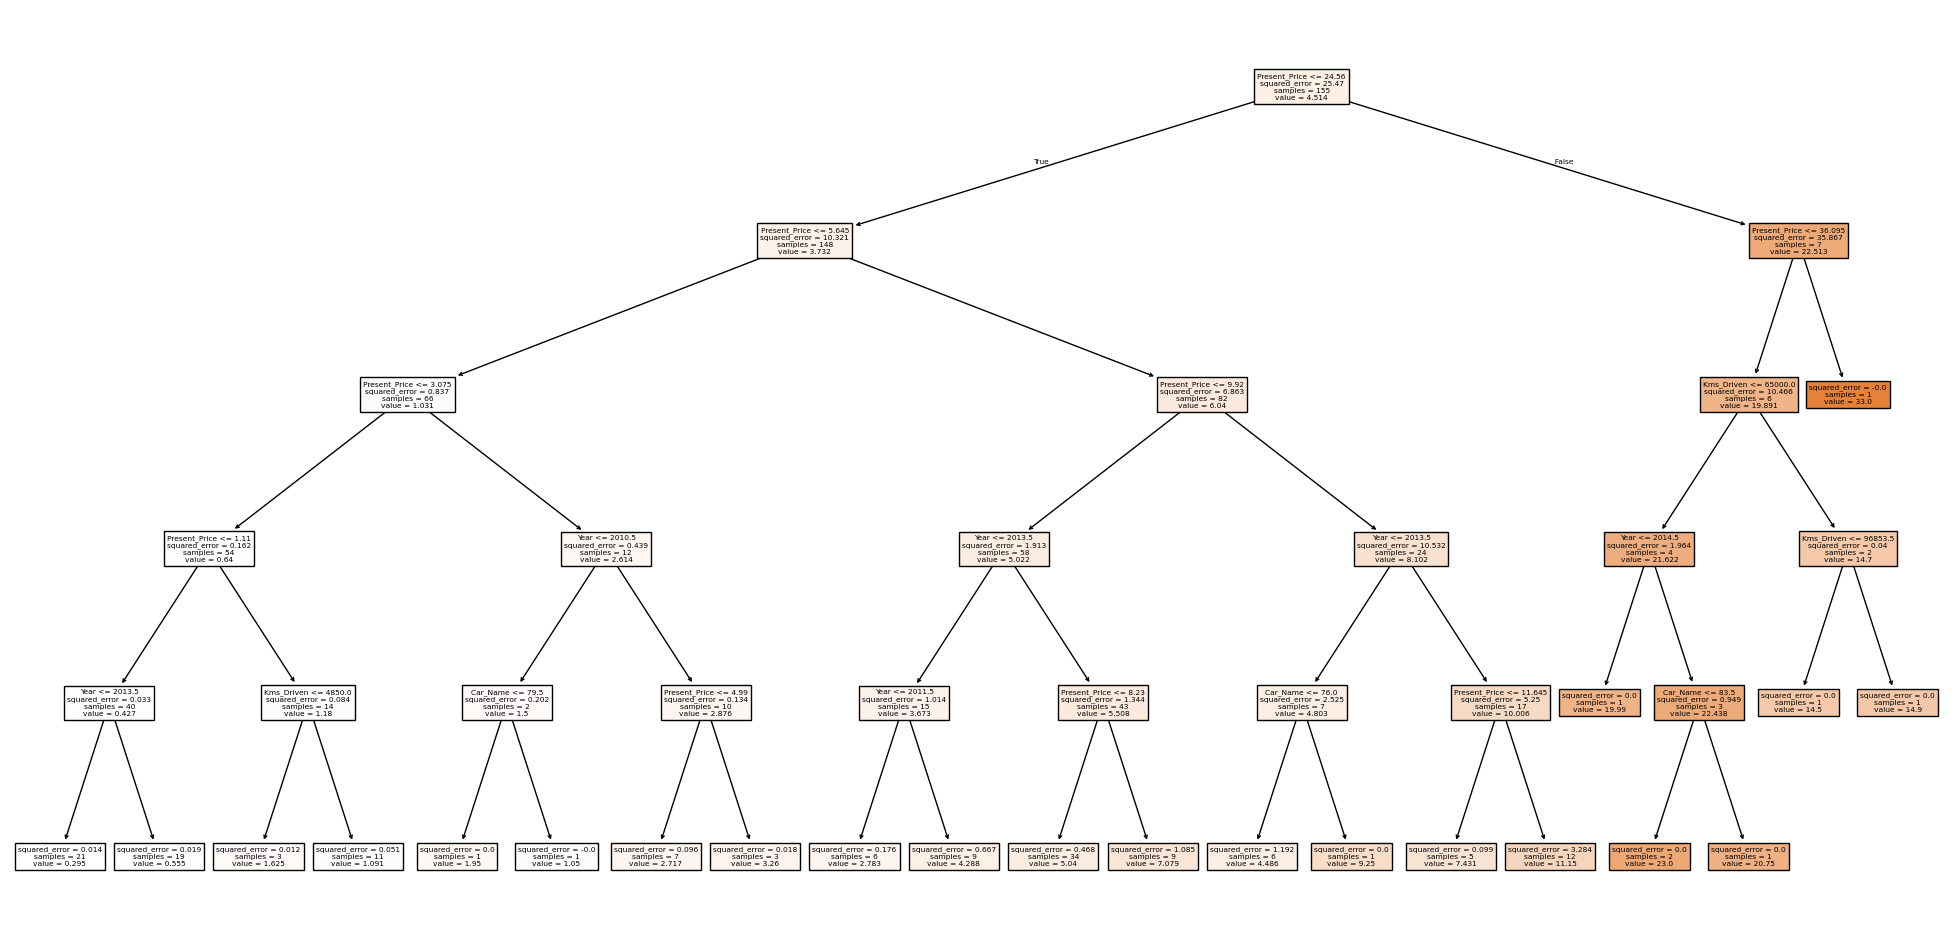

In [17]:
plt.figure(figsize=(25, 12))

plot_tree(
    model.estimators_[0],   # first tree
    feature_names=X.columns,
    class_names=True,
    filled=True
)

plt.show()


In [18]:
importances = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df


,Feature,Importance
2,Present_Price,0.879370
1,Year,0.053810
3,Kms_Driven,0.029275
0,Car_Name,0.023955
6,Transmission,0.010584
5,Seller_Type,0.001693
7,Owner,0.000738
4,Fuel_Type,0.000575
